In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv("cleaned_data.csv")

In [91]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,year,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,1.0,1.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,4.0,0.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,4.0,1.0,yes,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,2.0,1.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,4.0,1.0,no,yes,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [92]:
df.shape

(40787, 22)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40787 entries, 0 to 40786
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40787 non-null  int64  
 1   job             40787 non-null  object 
 2   marital         40787 non-null  object 
 3   education       39191 non-null  float64
 4   default         40787 non-null  float64
 5   housing         40787 non-null  object 
 6   loan            40787 non-null  object 
 7   contact         40787 non-null  object 
 8   month           40787 non-null  object 
 9   year            40787 non-null  int64  
 10  day_of_week     40787 non-null  object 
 11  duration        40787 non-null  int64  
 12  campaign        40787 non-null  int64  
 13  pdays           40787 non-null  int64  
 14  previous        40787 non-null  int64  
 15  poutcome        40787 non-null  object 
 16  emp.var.rate    40787 non-null  float64
 17  cons.price.idx  40787 non-null 

In [94]:
# Change column names for readibility

new_column_names = {'y': 'subscribed', 'pdays': 'prev_days', 'poutcome': 'prev_outcome'}
df = df.rename(columns=new_column_names)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'year', 'day_of_week', 'duration', 'campaign',
       'prev_days', 'previous', 'prev_outcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'subscribed'],
      dtype='object')

# Feature Understanding

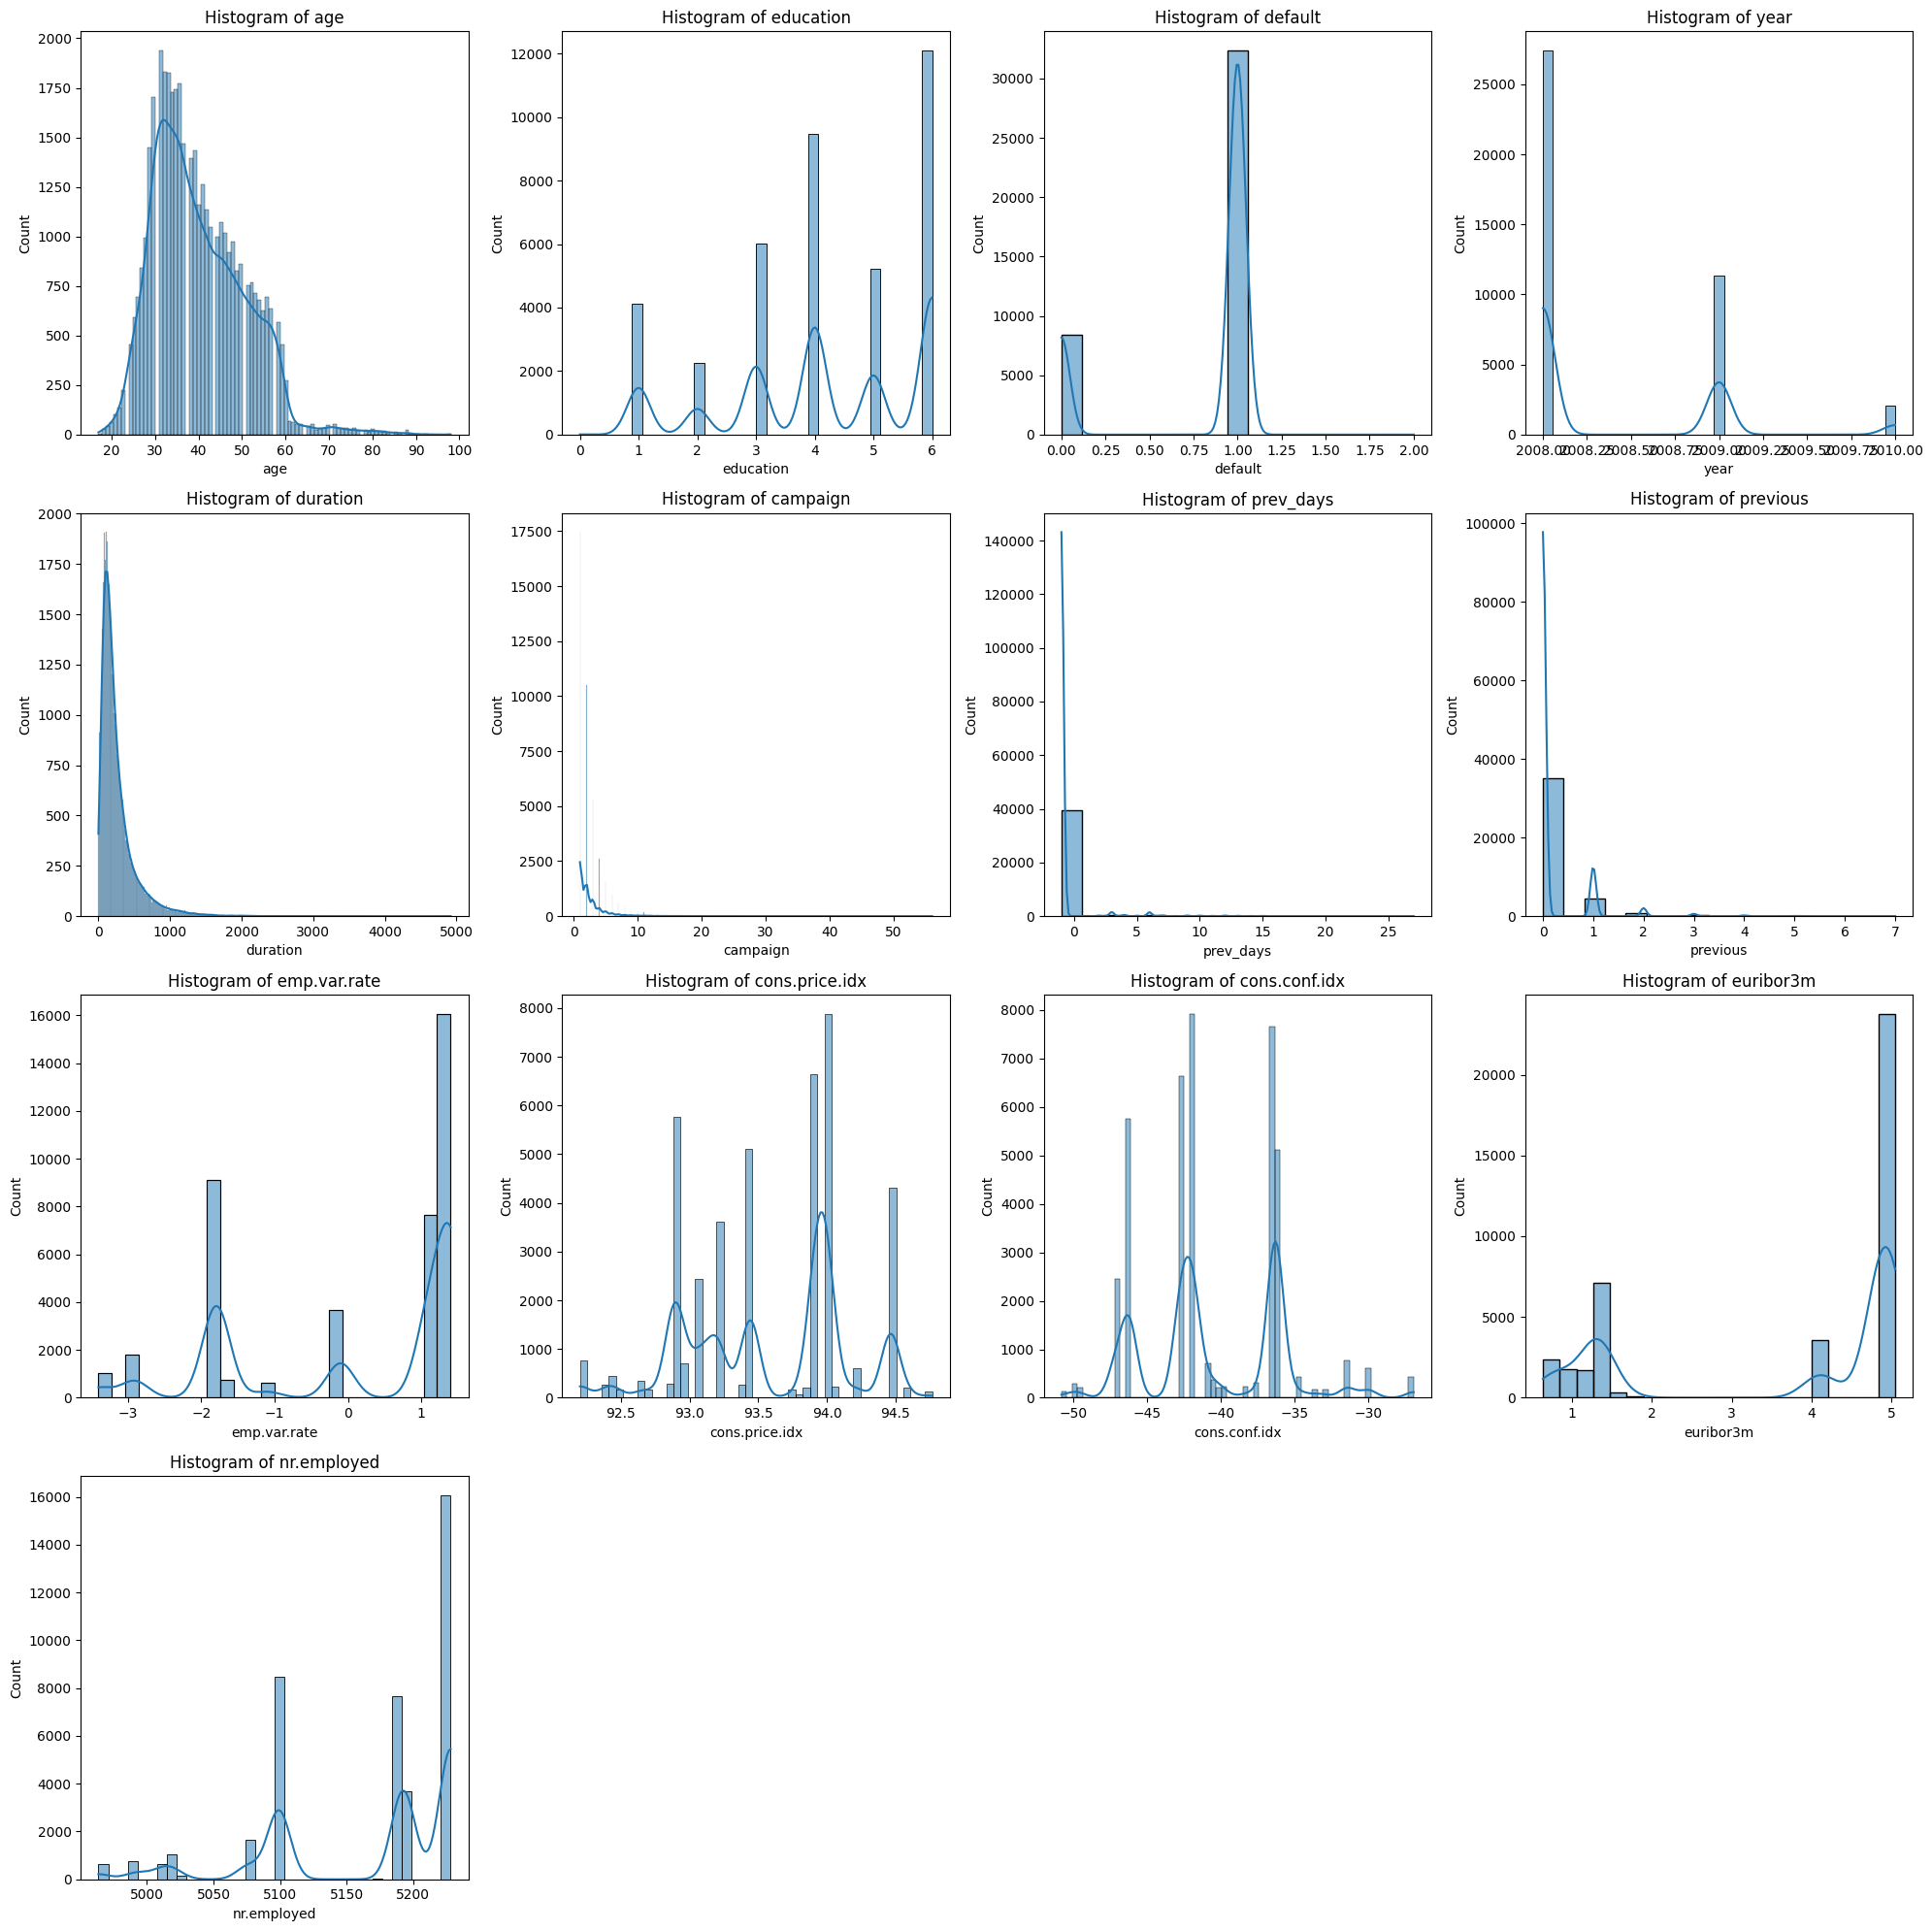

In [95]:
# Define the list of continuous columns
continuous_cols = ["age", "education", "default", "year", "duration", "campaign", "prev_days", "previous",
                   "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

# Set the number of columns and rows for the subplot grid
num_cols = 4
num_rows = len(continuous_cols) // num_cols + (1 if len(continuous_cols) % num_cols > 0 else 0) 

# Initialize the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D axes array

# Loop through the continuous columns and plot the histograms
for idx, col in enumerate(continuous_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {col}')

# Remove extra subplots (if any)
for idx in range(len(continuous_cols), num_rows * num_cols):
    fig.delaxes(axes[idx])

# Display the plots
plt.tight_layout()
plt.show()

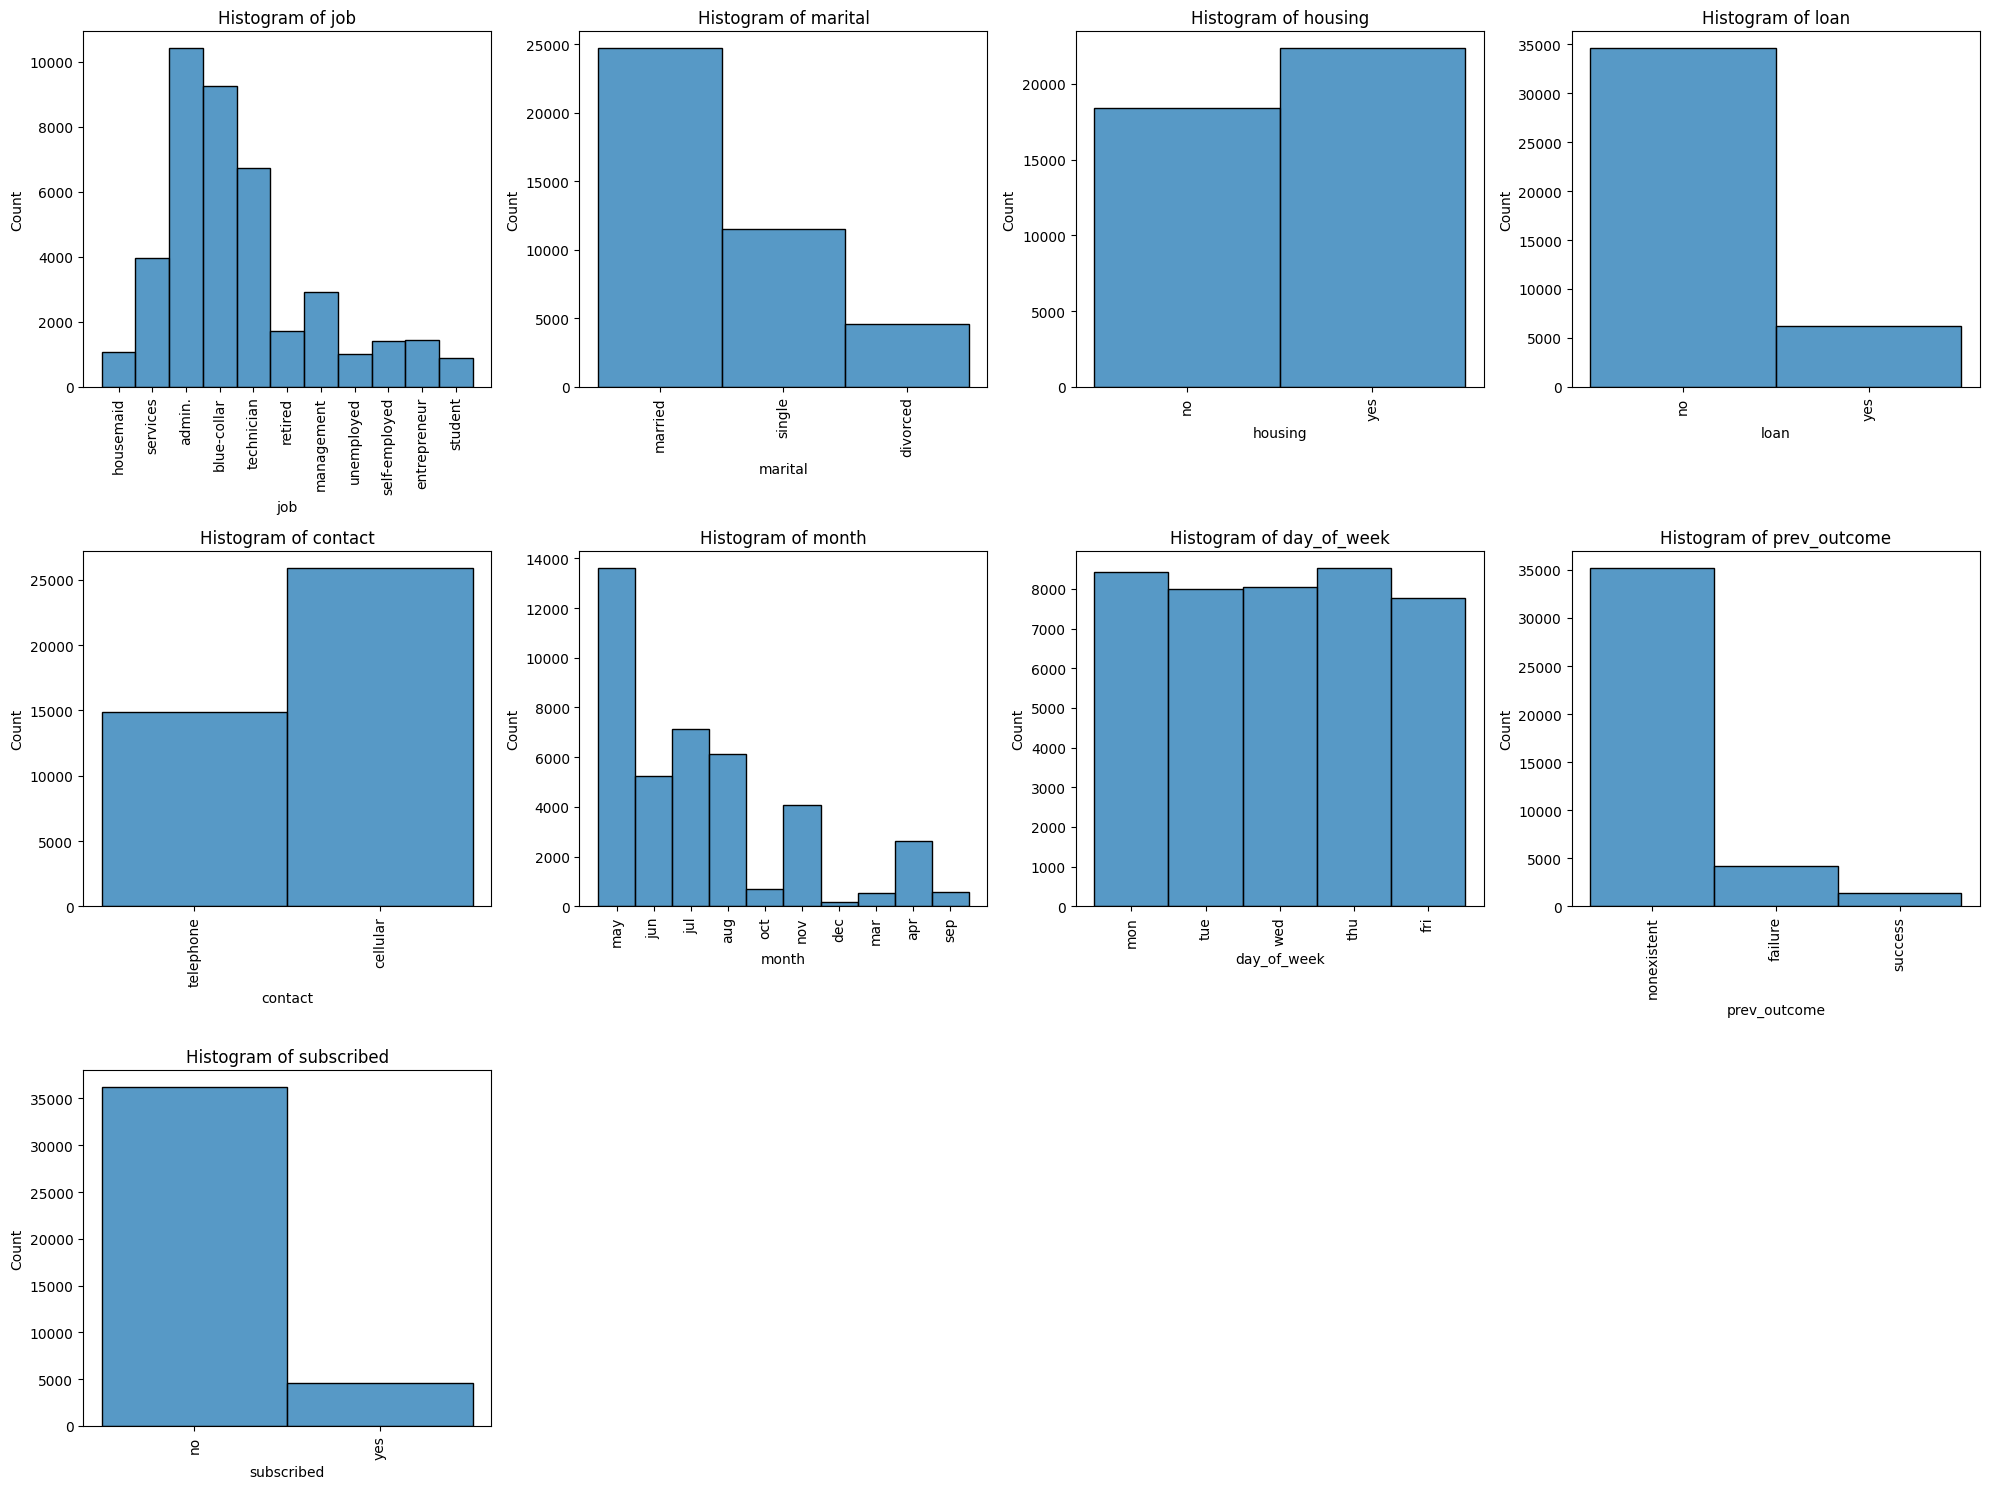

In [96]:
categorical_cols = ["job", "marital", "housing", "loan", "contact", "month", "day_of_week", "prev_outcome", "subscribed"]

# Set the number of columns and rows for the subplot grid
num_cols = 4
num_rows = len(categorical_cols) // num_cols + (1 if len(categorical_cols) % num_cols > 0 else 0) 

# Initialize the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D axes array

# Loop through the categorical columns and plot the histograms
for idx, col in enumerate(categorical_cols):
    sns.histplot(data=df, x=col, ax=axes[idx])
    axes[idx].tick_params(axis='x', rotation=90)
    axes[idx].set_title(f'Histogram of {col}')

# Remove extra subplots (if any)
for idx in range(len(categorical_cols), num_rows * num_cols):
    fig.delaxes(axes[idx])


plt.tight_layout()
plt.show()

Examining both the categorical and continuous data, the distributions appear to be as expected. Some of the continuous variables show multiple peaks, but this is in line with the nature of the data, so it's not out of the ordinary. Likewise, the categorical variables demonstrate distributions that are consistent with their respective columns, indicating overall good results.

# Analysis

In [97]:
age_s_unique = np.sort(df['age'].unique())
age_s_unique

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 91, 92, 94, 95, 98], dtype=int64)

In [98]:
# Create age categories
bins = [0, 18, 30, 50, 65, 100]

age_cats = ['Under 18', '18-30', '30-50', '50-65', 'Over 65']

df['age-group'] = pd.cut(df['age'], bins=bins, labels=age_cats)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,year,...,prev_days,previous,prev_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,age-group
0,56,housemaid,married,1.0,1.0,no,no,telephone,may,2008,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-65
1,57,services,married,4.0,0.0,no,no,telephone,may,2008,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-65
2,37,services,married,4.0,1.0,yes,no,telephone,may,2008,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-50
3,40,admin.,married,2.0,1.0,no,no,telephone,may,2008,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-50
4,56,services,married,4.0,1.0,no,yes,telephone,may,2008,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-65


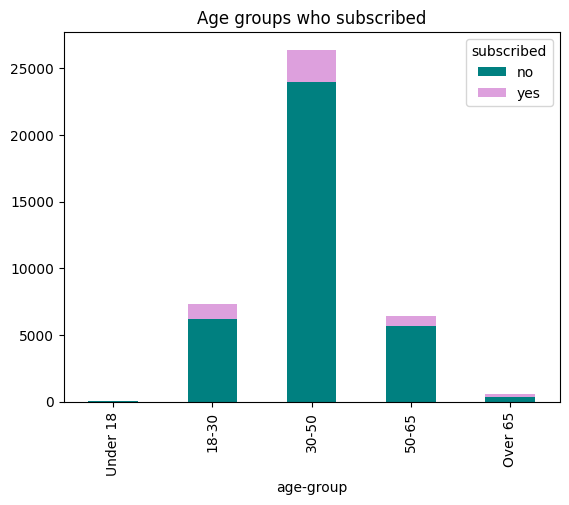

In [100]:
df.groupby(['age-group', 'subscribed']).size().unstack().plot(kind='bar', stacked=True,
            color=['teal','plum'], title='Age groups who subscribed')
plt.show()

As we can see 30-50 has the largest amount subscribed 

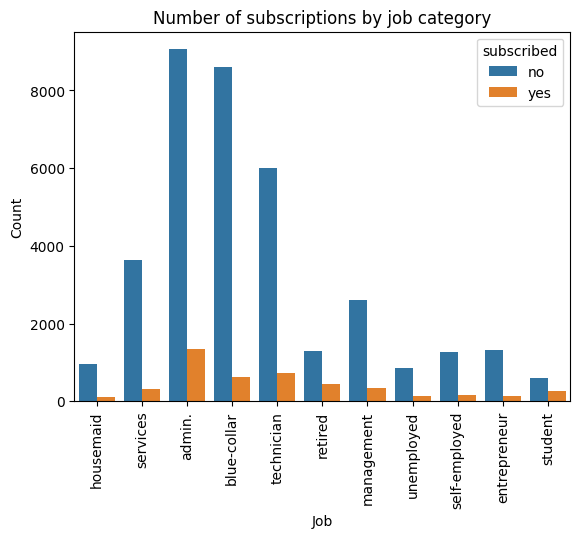

In [108]:
sns.countplot(data=df, x='job', hue='subscribed')

plt.title('Number of subscriptions by job category')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

Majority of each job class do not subscribe, we can look inot this data more to find comparisons

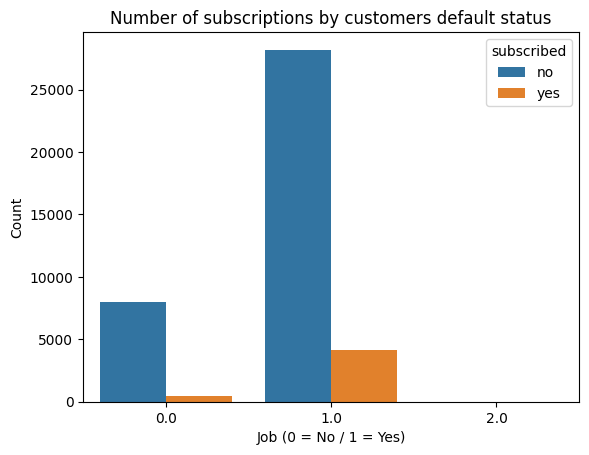

In [119]:
sns.countplot(data=df, x='default', hue='subscribed')

plt.title('Number of subscriptions by customers default status')
plt.xlabel('Job (0 = No / 1 = Yes)')
plt.ylabel('Count')

plt.show()

The majority of customers in default have opted not to subscribe, which is not surprising considering their financial situation is likely to be less than ideal due to being in default.

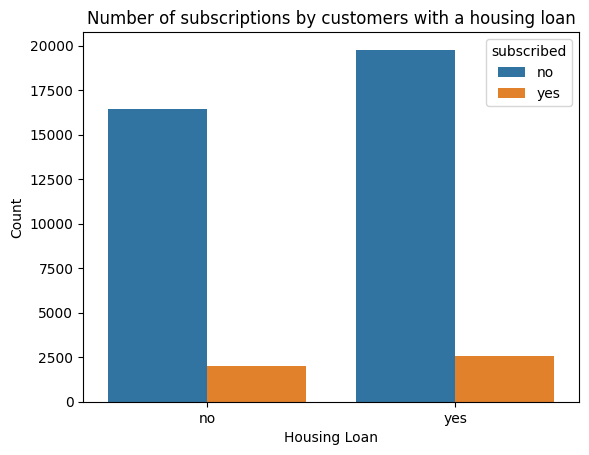

In [118]:
sns.countplot(data=df, x='housing', hue='subscribed')

plt.title('Number of subscriptions by customers with a housing loan')
plt.xlabel('Housing Loan')
plt.ylabel('Count')

plt.show()

The presence of a housing loan does not appear to have a significant impact on the number of subscribers, as both charts exhibit a similar distribution

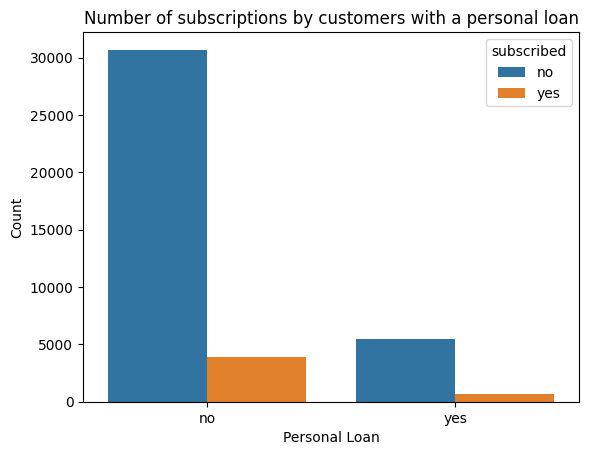

In [120]:
sns.countplot(data=df, x='loan', hue='subscribed')

plt.title('Number of subscriptions by customers with a personal loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')

plt.show()

A large number of people without loans have also opted not to subscribe. This should be further investgated to better understand the underlying factors influencing their decision